# TODO LIST
--------


- [x] Genral collect for dataset
- [ ] Complete dataset
- [x] Make settings in an external file
- [ ] Make settings in an external file
- [ ] Make requirement installations in another file
- [ ] Clean Data & prepocessing
- [ ] Stemming / Lemmitization
- [ ] Replace Review Cleaning data by apply 


# Requirements Installations

In [14]:
# Run just once 
!pip install webdriver-manager
!pip install selenium
!pip install requests
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [15]:
# imports
import os
import sys
import requests as rq
import numpy as np
import pandas as pd
import re 
import spacy
import string
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.utils import ChromeType
import unicodedata
import pickle as pk
# end imports

# Part 01  : Data Gathering

In [16]:
# Settings 
reviews_div_cls = 'review'


prod_urls = {'informatique':
              [
                {
                    'prod_id': 1,
                    'prod_url':
                    'https://www.amazon.fr/dp/B00VWEK4IG/ref=redir_mobile_desktop?_encoding=UTF8&aaxitk=.H.saUSQi0IDvqb-Ff4aow&hsa_cr_id=3200936120002&pd_rd_plhdr=t&pd_rd_r=01bb0b8a-0cca-4f13-b9af-530d3f06523e&pd_rd_w=6TgrH&pd_rd_wg=VzOfs&ref_=sbx_be_s_sparkle_td_asin_0_img',
                    'rev_url':
                    'https://www.amazon.fr/Avantree-Bluetooth-Adaptateur-équipements-Enceintes/product-reviews/B00VWEK4IG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
                    'rev_pages': 5 ,
                    'rev_count' : 50
                
                },
                {
                    'prod_id': 2,
                    'prod_url':
                    'https://www.amazon.fr/HP-302-Pack-cartouches-Authentiques/dp/B01LXLFF6H?ref_=Oct_s9_apbd_omwf_hd_bw_bN4CkB&pf_rd_r=V2TTM35Y3ZRBSP9XFVDS&pf_rd_p=3d37f0c5-041f-5707-bec0-94d62f6af77d&pf_rd_s=merchandised-search-10&pf_rd_t=BROWSE&pf_rd_i=340858031&th=1',
                    'rev_url':
                    'https://www.amazon.fr/HP-302-Pack-cartouches-Authentiques/product-reviews/B01LXLFF6H/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
                    'rev_pages': 10 ,
                    'rev_count' : 100
                
                },
               {
                   'prod_id':3,
                   'prod_url':
                   'https://www.amazon.fr/Logitech-capteur-programmables-ordinateur-portable/dp/B07GS6ZB7T/ref=sr_1_6?brr=1&dchild=1&qid=1618071105&rd=1&s=computers&sr=1-6&th=1',
                   'rev_url':
                   'https://www.amazon.fr/Logitech-capteur-programmables-ordinateur-portable/product-reviews/B07GS6ZB7T/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
                   'rev_pages': 10 ,
                   'rev_count' : 100
                   
               },
               {
                   'prod_id':4,
                   'prod_url':
                   'https://www.amazon.fr/microSDXC-SanDisk-Adaptateur-Performances-Applicatives/dp/B07FCMKK5X/ref=sr_1_4?brr=1&dchild=1&qid=1618071452&rd=1&s=computers&sr=1-4&th=1',
                   'rev_url':
                   'https://www.amazon.fr/microSDXC-SanDisk-Adaptateur-Performances-Applicatives/product-reviews/B07FCMKK5X/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
                   'rev_pages': 10 ,
                   'rev_count' : 100
                
                   
               }
            ],
            'cuisine':
            [
              {
                  'prod_id': 5,
                  'prod_url':
                  'https://www.amazon.fr/AmazonBasics-Batterie-Cuisine-Anti-adh%C3%A9sive-pi%C3%A8ces/dp/B07481LPMF/ref=sr_1_5?_encoding=UTF8&c=ts&dchild=1&keywords=Casseroles%2C+po%C3%AAles+et+faitouts&qid=1618067686&s=kitchen&sr=1-5&ts_id=2969505031',
                  'rev_url':
                  'https://www.amazon.fr/AmazonBasics-Batterie-Cuisine-Anti-adh%C3%A9sive-pi%C3%A8ces/product-reviews/B07481LPMF/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews',
                  'rev_pages': 5 ,
                  'rev_count' : 50
              
              },
             {
                'prod_id':6,
                'prod_url':
                'https://www.amazon.fr/céramique-Cadrim-Ensembles-couteaux-Couteaux/dp/B01N5JIZH5/ref=sr_1_4?_encoding=UTF8&c=ts&dchild=1&keywords=Couteaux+et+Ustensiles+de+Cuisine&qid=1618088450&s=kitchen&sr=1-4&ts_id=57698031',
                'rev_url':
                'https://www.amazon.fr/céramique-Cadrim-Ensembles-couteaux-Couteaux/product-reviews/B01N5JIZH5/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
                'rev_pages': 5 ,
                'rev_count' : 50
                 
                   
              },
             {
                'prod_id':7,
                'prod_url':
                'https://www.amazon.fr/Homgeek-Milk-shake-Bouteilles-Portables-Couvercles/dp/B073XM1TTL?ref_=Oct_s9_apbd_otopr_hd_bw_b3rBLr&pf_rd_r=TC0P3DGNKKBWDWSEDFDM&pf_rd_p=16c350e6-3538-5eed-b91d-8bc2af2c901d&pf_rd_s=merchandised-search-10&pf_rd_t=BROWSE&pf_rd_i=57004031',
                'rev_url':
                'https://www.amazon.fr/Homgeek-Milk-shake-Bouteilles-Portables-Couvercles/product-reviews/B073XM1TTL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
                'rev_pages': 5 ,
                'rev_count' : 50 
             },
             {
                'prod_id':8,
                'prod_url':
                'https://www.amazon.fr/Moulinex-Intelligent-Multicuiseur-Recettes-Finition/dp/B00TQILY02?ref_=Oct_s9_apbd_omg_hd_bw_b3rBLr&pf_rd_r=TC0P3DGNKKBWDWSEDFDM&pf_rd_p=8c39304b-cce6-57e6-b16f-e4d3d7c89e6a&pf_rd_s=merchandised-search-10&pf_rd_t=BROWSE&pf_rd_i=57004031',
                'rev_url':
                'https://www.amazon.fr/Moulinex-Intelligent-Multicuiseur-Recettes-Finition/product-reviews/B00TQILY02/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
                'rev_pages': 5 ,
                'rev_count' : 50  
             }
            ],
             'sports':
             [
              {
                  'prod_id': 9,
                  'prod_url':
                  'https://www.amazon.fr/Gritin-Résistance-Équipement-dExercices-Musculation/dp/B07L9WLKZQ?ref_=Oct_s9_apbd_otopr_hd_bw_bM2FLL&pf_rd_r=6FSMC9T9ZZE6ZNS4JFYA&pf_rd_p=9c37dc66-fb80-563a-854b-d52a81222d81&pf_rd_s=merchandised-search-11&pf_rd_t=BROWSE&pf_rd_i=325615031',
                  'rev_url':
                  'https://www.amazon.fr/Gritin-Résistance-Équipement-dExercices-Musculation/product-reviews/B07L9WLKZQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
                  'rev_pages': 5 ,
                  'rev_count' : 50
              
              },
              {
                  'prod_id': 10,
                  'prod_url':
                  'https://www.amazon.fr/AMONAX-Roller-Roue-Exercice-Abdominaux-Musculation/dp/B081Z7BBMB?ref_=Oct_s9_apbd_oup_hd_bw_bM2FLL&pf_rd_r=6FSMC9T9ZZE6ZNS4JFYA&pf_rd_p=427a8d4e-455a-5ee8-bb93-7b8c5126c94b&pf_rd_s=merchandised-search-11&pf_rd_t=BROWSE&pf_rd_i=325615031',
                  'rev_url':
                  'https://www.amazon.fr/AMONAX-Roller-Roue-Exercice-Abdominaux-Musculation/product-reviews/B081Z7BBMB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
                  'rev_pages': 5 ,
                  'rev_count' : 50
                 
              },
              {
                  'prod_id': 11,
                  'prod_url':
                  'https://www.amazon.fr/Berkey-Stainless-Rubberized-Non-skid-Gravity/dp/B00S6S4Y7S/ref=sr_1_1_sspa?__mk_fr_FR=ÅMÅŽÕÑ&crid=5SI3GPRI8S3X&dchild=1&keywords=british+berkefeld&qid=1618502490&sprefix=brisis%2Caps%2C248&sr=8-1-spons&psc=1&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUExMzZSNlNPOVNQOFJKJmVuY3J5cHRlZElkPUEwMDA2MDE1MUdCUFZEVjU0VTVYQiZlbmNyeXB0ZWRBZElkPUEwODUyNDQxMTJMV01FTkk0S0xPVCZ3aWRnZXROYW1lPXNwX2F0ZiZhY3Rpb249Y2xpY2tSZWRpcmVjdCZkb05vdExvZ0NsaWNrPXRydWU=',
                  'rev_url':
                  'https://www.amazon.fr/Berkey-Stainless-Rubberized-Non-skid-Gravity/product-reviews/B00S6S4Y7S/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
                  'rev_pages': 5 ,
                  'rev_count' : 50
                   
              }

             ]
             
             
}

prod_cols = ['Prod_Title','Prod_Brnd','Prod_Rate','Prod_Eval','Prod_Price','Category','Nb_Revs','Prod_ID']
rev_cols = ['Rev_Title','Rev_Rate','Rev_Bdy','Rev_Hlp','Rev_Home','Prod_ID']


# To split settings into another file
settings_file = open("settings.pkl", "wb")
pk.dump(prod_urls, settings_file)
settings_file.close()

settings_file = open("settings.pkl", "rb")
output = pk.load(settings_file)



# End Settings

## Scrapping Product Information

In [17]:

# Scrapping Product Data 
def product_scrapper(driver,prod_category,prod_url):
    driver.get(prod_url)
    prod_soup = BeautifulSoup(driver.page_source,'html.parser')

    # Product Info
    prod_title = prod_soup.find('span',{'id' : 'productTitle' }).text
    prod_brand = prod_soup.find('a',{'id' : 'bylineInfo' }).text
    prod_rate = prod_soup.find('span',{'class' : 'a-icon-alt' }).text
    prod_eval = prod_soup.find('span',{'id' : 'acrCustomerReviewText' }).text
    try :
      prod_price = prod_soup.find('span',{'id' : 'priceblock_ourprice' }).text
    except AttributeError:
      prod_price = '0'

    result = tuple(map(lambda x : unicodedata.normalize("NFKD",x.strip()),[prod_title,prod_brand,prod_rate,prod_eval,prod_price,prod_category]))
    return result



## Scrapping Reviews Data

In [18]:
# Scrapping Reviews Data
def reviews_scrapper(driver,prod,rev_url,ds):
    driver.get(rev_url)
    rev_soup = BeautifulSoup(driver.page_source,'html.parser')
    reviews_div = rev_soup.find_all('div',{'class':reviews_div_cls})

    for review in reviews_div:
        try :
          review_title = review.find('a',{'data-hook' : 'review-title'}).text
        except AttributeError:
          review_title = 'Null'
        
        try :
          review_rate = review.find('i',{'data-hook' : 'review-star-rating'}).text
        except AttributeError:
          review_rate = '0'
        
        review_body = review.find('span',{'data-hook' : 'review-body'}).text
        
        try :
          review_help = review.find('span',{'data-hook' : 'helpful-vote-statement'}).text
        except AttributeError:
          review_help = '0'
        try :
          review_home= review.find('span',{'data-hook' :'review-date'}).text 
        except AttributeError:
          review_home ='0'   
        
        rev_result = tuple(map(lambda x : unicodedata.normalize("NFKD",x.strip()),[review_title,review_rate,review_body,review_help,review_home]))
        ds.append(rev_result+(prod,))

    return ds

## Testing data collect

## Setup the web-driver 

In [19]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options = options)

## Scrapping Products

In [20]:
lst_prod = [] 
for category,products in prod_urls.items():
    for prod in products:
        product = product_scrapper(driver,category,prod['prod_url'])+(prod['rev_count'],prod['prod_id'])
        lst_prod.append(product)




df_prod = pd.DataFrame(lst_prod)
df_prod.columns = prod_cols
df_prod

,Prod_Title,Prod_Brnd,Prod_Rate,Prod_Eval,Prod_Price,Category,Nb_Revs,Prod_ID
0,Avantree DG40S USB Bluetooth Adaptateur Dongle...,Visiter la boutique Avantree,"4,3 sur 5 étoiles",18 908 évaluations,"12,99 €",informatique,50,1
1,HP 302 Pack de 2 Cartouches d'Encre Noire et T...,Visiter la boutique HP,"4,6 sur 5 étoiles",102 899 évaluations,"29,99 €",informatique,100,2
2,Logitech G502 HERO Souris Gamer Filaire Haute ...,Visiter la boutique Logitech G,"4,7 sur 5 étoiles",19 149 évaluations,"58,46 €",informatique,100,3
3,SanDisk Extreme Carte Mémoire MicroSDXC 128 G...,Visiter la boutique SanDisk,"4,7 sur 5 étoiles",41 182 évaluations,"21,17 €",informatique,100,4
4,Amazon Basics LFFP16027 Batterie de Cuisine An...,Visiter la boutique Amazon Basics,"4,4 sur 5 étoiles",26 886 évaluations,"60,29 €",cuisine,50,5
5,"Couteau en céramique ,Cadrim Ensembles de cou...",Marque : Cadrim,"4,2 sur 5 étoiles",3 464 évaluations,"19,59 €",cuisine,50,6
6,"Homgeek Mini Blender 350W, Blender smoothie et...",Visiter la boutique homgeek,"4,5 sur 5 étoiles",7 845 évaluations,"29,99 €",cuisine,50,7
7,Moulinex Cookeo Multicuiseur Intelligent 100 R...,Visiter la boutique Moulinex,"4,7 sur 5 étoiles",4 579 évaluations,"180,00 €",cuisine,50,8
8,"Gritin Bande Élastique Fitness, [Lot de 5] Ba...",Marque : Gritin,"4,3 sur 5 étoiles",9 311 évaluations,"8,99 €",sports,50,9
9,"AMONAX Roue Abdominale Convertible, AB Roller ...",Visiter la boutique Amonax,"4,6 sur 5 étoiles",1 156 évaluations,0,sports,50,10


## Scrapping Reviews Data




In [8]:
# This function help us to generate the dataset of reviews
# and also the dataframe of several products

lst_rev = []
for category,products in prod_urls.items():
    for prod in products:
        for i in range(1,prod['rev_pages']+1):
            lst_rev = reviews_scrapper(driver,prod['prod_id'],f'{prod["rev_url"]}&pageNumber={i}',lst_rev) 

df_rev = pd.DataFrame(lst_rev)
df_rev.columns = rev_cols

 
df_rev.to_csv("Review_data.csv",index = False)


In [9]:
def build_dataset():
  ds = df_rev[df_rev["Rev_Home"] == 'France']
  ds = ds[["Rev_Title","Rev_Bdy"]]
  return ds


ds = build_dataset()
ds

,Rev_Title,Rev_Bdy


# Part 02 : Data Cleaning

In [10]:

# Clean Review Body
def clean_review_body(rev):
  # Make text to lowerCase
  clean_rev = rev.lower()
  # Remove ponctuation like .,!? etc
  clean_rev = clean_rev.translate(str.maketrans('','',string.punctuation))
  # Remove words that contain numbers
  clean_rev = re.sub(r'\w*\d\w*','',clean_rev)
  return clean_rev
  
# Clean reviews DataFrame 
def clean_reviews(df_rev):
    # Cleaning Hlp Review
    df_rev['Rev_Hlp'] = df_rev.Rev_Hlp.apply(lambda x: re.sub("[^0-9]","",x))
    # Cleaning Rate review  
    df_rev['Rev_Rate'] = df_rev.Rev_Rate.str.split(' ').apply(lambda x: float(x[0].replace(',','.')))
    # Cleaning Home Review
    df_rev['Rev_Home'] = df_rev.Rev_Home.str.split(' ').apply(lambda x: x[2])

    # Cleaning the body of the review
    # Convert the letter into lowercase
    # Remove ponctuation like .,!? etc
    df_rev['Rev_Bdy'] = df_rev.Rev_Bdy.apply(lambda x: clean_review_body(x))
    
    df_rev = df_rev[df_rev.Rev_Home =='France']

    return df_rev



df_rev = pd.read_csv("Review_data.csv")
df_rev=clean_reviews(df_rev)
df_rev



,Rev_Title,Rev_Rate,Rev_Bdy,Rev_Hlp,Rev_Home,Prod_ID
0,Génial !,5.0,jai commandé ce produit pour pouvoir écouter...,60,France,1
1,En panne après moins de 2 mois d'utilisation,1.0,pour un adaptateur de ce prix jaurais espéré...,22,France,1
2,Compatible pour Dualshock PS4,5.0,acheté pour branchée la manette sur le pc j...,38,France,1
3,Dongle Bluetooh parfait,5.0,jutilise ce dongle bluetooth sur un pc windows...,25,France,1
4,Impeccable,5.0,quand je vois certains commentaires de certain...,16,France,1
...,...,...,...,...,...,...
659,Support esthétique,5.0,support esthétique,0,France,11
660,Pratique,4.0,indispensable pour une meilleure ergonomie,0,France,11
661,CONFORME ET LIVRAISON RAPIDE,5.0,parfait ras,0,France,11
662,positif & négatif,5.0,bonjour à tous le positif le produit en lui...,4,France,11


# Part 03 : Sentiment Analysis

## Extract useful data

In [11]:
# TreshHolds 
neg_th = 2
pos_th = 3.5 

def label_encoder(label):
  if (label <= neg_th) :
    return -1 
  elif (label >= pos_th) :
     return 1 
  else : 
    return 0

print(label_encoder(3.5))

def useful_df(df_rev):
  X = df_rev.copy()
  X = X.drop('Rev_Rate', axis = 1)
  X = X.drop('Rev_Hlp', axis = 1)
  X = X.drop('Rev_Home', axis = 1)
  X = X.drop('Prod_ID', axis = 1)
  y = df_rev['Rev_Rate'].apply(label_encoder).to_frame()
  return X,y


X,y = useful_df(df_rev)
X

1


,Rev_Title,Rev_Bdy
0,Génial !,jai commandé ce produit pour pouvoir écouter...
1,En panne après moins de 2 mois d'utilisation,pour un adaptateur de ce prix jaurais espéré...
2,Compatible pour Dualshock PS4,acheté pour branchée la manette sur le pc j...
3,Dongle Bluetooh parfait,jutilise ce dongle bluetooth sur un pc windows...
4,Impeccable,quand je vois certains commentaires de certain...
...,...,...
659,Support esthétique,support esthétique
660,Pratique,indispensable pour une meilleure ergonomie
661,CONFORME ET LIVRAISON RAPIDE,parfait ras
662,positif & négatif,bonjour à tous le positif le produit en lui...


## Data Matrix (Vectorizer)

In [12]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer

stopwords = stopwords.words('french')

def data_to_matrix(data):
  # Building the Victorizer
  stemmer = FrenchStemmer()
  analyzer = TfidfVectorizer().build_analyzer()
  vec = TfidfVectorizer(stop_words = stopwords,
                        analyzer = lambda doc:(stemmer.stem(w) for w in analyzer(doc)),
                        ngram_range = (1,3))
  # Build the new matrix dataset
  mx_rev = vec.fit_transform(data.Rev_Bdy) 
  df_rev = pd.DataFrame(mx_rev.toarray(),columns = vec.get_feature_names())
  df_rev.index = data.index
  df_rev.insert(0, 'Title', data.Rev_Title)
  return df_rev


mx_rev = data_to_matrix(X)
mx_rev

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Title,aa,ab,abaiss,abandon,abb,abdo,abdominal,abdominauxvous,abdos,aberr,abi,abim,able,ablel,ablement,ablesm,abonnementd,abord,about,absolu,abus,acce,acceler,accept,accessibilit,accessibl,accessiblel,accessiblesour,accessoir,accident,accidentel,accol,accompagn,accompl,accord,accro,accroc,accroch,accueil,...,windo,windos,window,windowsaucun,witch,without,wittenheim,wizard,wordpptseul,worl,world,wot,writ,xbox,xiaom,xl,xlle,xltre,xp,xpdonc,xperi,xpro,xubuntu,xxlquant,xz,yaourt,yatil,yen,yeux,yog,you,your,youtub,ze,zeld,zon,zow,zte,œuvr,μsd
0,Génial !,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,En panne après moins de 2 mois d'utilisation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.088458,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Compatible pour Dualshock PS4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.161763,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Dongle Bluetooh parfait,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.118122,0.200838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Impeccable,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.087762,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,Support esthétique,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660,Pratique,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
661,CONFORME ET LIVRAISON RAPIDE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
662,positif & négatif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Subjectivity & Polarity of reviews 

IndexError: ignored

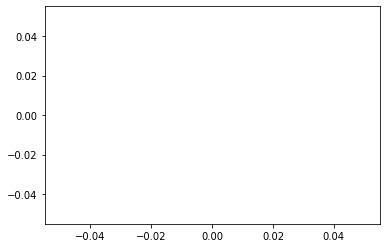

In [13]:
from textblob import TextBlob

# To exctract subjectivity from a message **msg
def get_subjectivity(msg):
  return TextBlob(msg).sentiment.subjectivity

# To exctract polarity from a message **msg
def get_polarity(msg):
  return TextBlob(msg).sentiment.polarity

def get_sentiment(data):
    if data > 0 : 
      return 'Positive'
    elif data < 0 :
      return 'Negative'
    else : 
      return 'Neutral'

ds['Subjectivity'] = ds['Rev_Bdy'].apply(get_subjectivity)
ds['Polarity'] = ds['Rev_Bdy'].apply(get_polarity)
ds['Sentiment'] = ds['Polarity'].apply(get_sentiment)

sentiment_stats = pd.value_counts(ds['Sentiment'].values, sort=True)

sentiment_stats.plot.barh()


## Visualize DataSet

In [ ]:
def visualize_data():
  col = np.where(ds['Sentiment'] == 'Positive','g',np.where(ds['Sentiment'] == 'Negative','r','b'))
  fig, ax = plt.subplots()
  scatter = ax.scatter(ds['Polarity'],ds['Subjectivity'], c = col)
  
  ax.set_title('Sentiment Analysis')
  ax.set_xlabel('Polarity')
  ax.set_ylabel('Subjectivity')


visualize_data()



# Part 04 : Build ML-Models 

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline



df = mx_rev.drop('Title',axis = 1) 
X_train , X_test , y_train , y_test = train_test_split(df,y,test_size = 0.3)


params = {
    'kernel' : ['poly','rbf'],
    'C' : [1,2,5,10,20,50,100,200,1000,2000,5000],
    'gamma' : [1e-1,1e-2,1e-3, 1e-4,1e-5],
    'degree' : [2,3],
    'decision_function_shape' : ['ovo','ovr'],

}
svm = SVC()
grid = GridSearchCV(svm,param_grid = params , cv = 4)


grid.fit(X_train,y_train)





In [ ]:
print(grid.best_params_)

print(grid.score(X_test,y_test))